# Covid19 Cases and Deaths Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### 1) Business Understanding

How Data Science Is Being Used to answer COVID-19 questions like spread and death rate predictions

Here I am trying to get some meaning full insights into the following questions.

1. Most death rated countries?
2. Predict total cases for a given country?
3. Predict total deaths for a given country?

### Load and Explore the Data

Loadindg the csv data from local path and creating pandas dataframe

In [0]:
#Load the csv data, creating pandas dataframe by persisting date format
world_df = pd.read_csv('covid-19.csv',parse_dates=['Date'])

In [3]:
#Display top 5 records
world_df.head(5)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


**Dataset Infomation**

*   Id - Serial Number 
*   Province_State - Respective State of the Country
*   Country_Region - Country Name
*   Date : Date(yyy-mm-dd) format
*   ConfirmedCases : Total cases till provided date(It's a cumilative number)
*   Fatalities : Total deaths till provided date(It's a cumilative number)

In [4]:
#view some basic statistical details like percentile, mean, std 
world_df.describe()

,Id,ConfirmedCases,Fatalities
count,27231.000000,27231.000000,27231.000000
mean,17828.000000,1372.808050,75.991444
std,10300.673333,9488.242361,808.719059
min,1.000000,0.000000,0.000000
25%,8914.500000,0.000000,0.000000
50%,17828.000000,2.000000,0.000000
75%,26741.500000,138.000000,1.000000
max,35655.000000,230597.000000,22745.000000


In [5]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27231 entries, 0 to 27230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              27231 non-null  int64         
 1   Province_State  11571 non-null  object        
 2   Country_Region  27231 non-null  object        
 3   Date            27231 non-null  datetime64[ns]
 4   ConfirmedCases  27231 non-null  float64       
 5   Fatalities      27231 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
#whether the data frame has any NAN values
world_df.isnull().values.any()

True

In [7]:
#whether the data frame has any NAN values
world_df.isnull().sum()

Id                    0
Province_State    15660
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

### Preprocessing the data

Only Province_State column has 15660 NAN values.There are multiple approaches to fill the values. Replacing NAN values with blank as data is partially available in this column

In [0]:
#Replace NAN values with blank string
world_df.fillna({'Province_State': ""},inplace=True)

#Drop unusefull columns if any 
world_df.drop("Id",axis=1,inplace=True)

### Data Visualizations

Total world wide Covid-19 cases and deaths representation

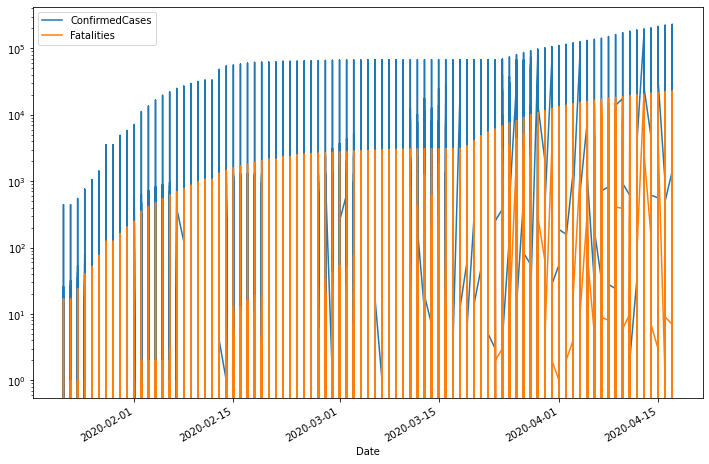

In [9]:
#bar chart for total confrimed and fatalities cases
axis = world_df[['Date','ConfirmedCases','Fatalities']].set_index('Date').plot(figsize=(12, 8),logy=True)
plt.show()

In [0]:
def mostEffectedCountries(world_df):
  """
  The function displays most effected countries in descending order. 

        Parameters: 
            world_df (DataFrame): The Dataframe to be processed       
        Returns: 
            country_df: A Dataframe which contains most effected countries cases sum
  """
  country_df = world_df.groupby('Country_Region')['ConfirmedCases'].sum().reset_index()
  country_df.sort_values(["ConfirmedCases"],ascending=False,inplace=True)
  return country_df


In [0]:
country_df = mostEffectedCountries(world_df)

Total 10 hostspots of covid19 cases

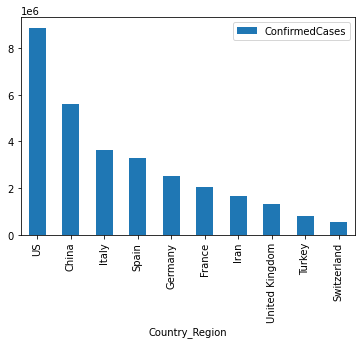

In [12]:
top_count = 10
country_df[:top_count].plot.bar(x='Country_Region',y = 'ConfirmedCases');

In [0]:
def ConfirmedCasesStateWise(df,country):
  """
  This functions displays confirmed cases with county and statewise groping

  Parameters
    df (dataframe) : The dataframe to be processed
    country (str) : Should be valid county name
  Returns:  
    state_df (dataframe) - Returns most corona confirmed cases statewise data
  """
  country_df = df[df.Country_Region == country][['Province_State','ConfirmedCases']]
  state_df = country_df.groupby('Province_State')['ConfirmedCases'].sum().reset_index()
  state_df.sort_values('ConfirmedCases',ascending=False,inplace=True)
  return state_df 

In [0]:
def FatalitiesStateWise(df,country):
  """
  This functions displays death cases with county and statewise groping

  Parameters
    df (dataframe) : The dataframe to be processed
    country (str) : Should be valid county name
  Returns:  
    state_df (dataframe) - Returns most corona confirmed cases statewise data
  """
  country_df = df[df.Country_Region == country][['Province_State','Fatalities']]
  state_df = country_df.groupby('Province_State')['Fatalities'].sum().reset_index()
  state_df.sort_values('Fatalities',ascending=False,inplace=True)
  return state_df

Total 10 hostspot cases states of covid19 cases within US

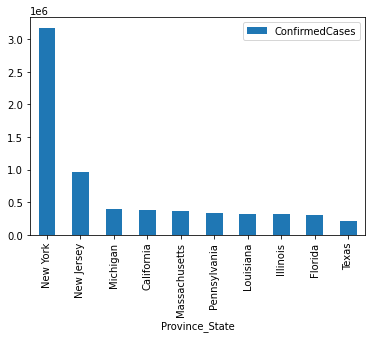

In [15]:
#Funtion works for any valid county code/name within the dataset
country = 'US'
state_df = ConfirmedCasesStateWise(world_df,country)
state_df[:10].plot.bar(x='Province_State',y = 'ConfirmedCases');

Total 10 Fatalities states of covid19 cases within US

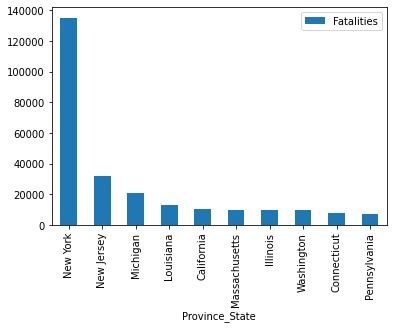

In [16]:
country = 'US'
state_death_df = FatalitiesStateWise(world_df,country)
state_death_df[:10].plot.bar(x='Province_State',y = 'Fatalities');

### Answer Questions

**Q1). Most death rated countries?**
    
    Simple Data Analysis and processing can answer this question by using basic mathematic formula (total deaths/total cases)* 100

#### Analysis

In [0]:
def highestDeathRate(df):
  """
  The function displays highest death rated country. 

  Parameters: 
            df (DataFrame): The Dataframe to be processed       
  Returns: 
            total_df (DataFrame): Sorted descending death rate countries
  """
  #grouping Fatalities data country wise
  country_death_df = df.groupby('Country_Region')['Fatalities'].sum().reset_index()
  #grouping ConfirmedCases data country wise
  country_cases_df = df.groupby('Country_Region')['ConfirmedCases'].sum().reset_index()
  #merging two dataframes
  total_df = country_death_df.merge(country_cases_df)
  #calculating death rate by (total deaths/total cases)* 100
  total_df['DeathRate']   = (total_df.Fatalities / total_df.ConfirmedCases)*100
  #To sort descending order
  total_df.sort_values('DeathRate',ascending=False,inplace=True)
  #Resetting indexes
  total_df.reset_index(inplace=True)
  #drop unused columns here
  total_df.drop(["index","ConfirmedCases","Fatalities"],axis=1,inplace=True)
  return total_df


In [0]:
#calling highestDeathRate function get Highest death rate countries
most_death_rate = highestDeathRate(world_df)
#top 5 display
most_death_rate = most_death_rate.head(20)

#### Visualize

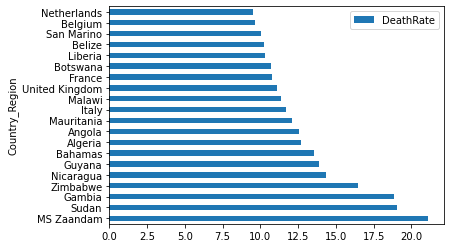

In [19]:
#plottingbar chart to display most death rated countries
axis = most_death_rate.plot.barh(x='Country_Region',y = 'DeathRate');
plt.show()

Most death rated countries are displayed through bar chart.
If notice most of them are economically poor countries. Their health care system would be very minimal. 






.

In order to answer question 2 & 3, need to build a model which helps providing predictions.

Developed a few generic functions for the same for reusability purpose

### Train and Test data split

In [0]:
def train_test_data_split(df,period=5):
  """
  This functions prepare train test data split

  Parameters
    df (dataframe) : The dataframe to be processed
    period (int) : Test dataset size(default is 5 days)
  Returns:  
    train_data (dataframe) - train set to train the model
    test_data (dataframe) -  test set to train the model
  """
  #Excluding last 5 for the training set
  train_data = df[:-period]
  #Including last 5 for the test set
  test_data =  df[-period:]
  return train_data,test_data

### Prophet Model Training

In [0]:
def modeling(train_data):
  """
  This functions helps in build and deploy the model

  Parameters
    train_data (dataframe) : train set to train the model
  Returns:  
    pm (prophet object) -  prophet object to run the predictions
  """
  #Prophet algorith helps to predict the time series data
  pm = Prophet(changepoint_prior_scale=0.95,interval_width=1)
  #training the model
  pm.fit(train_data)
  return pm

### Predictions

In [0]:
def predictions(pm,periods=5):
  """
  This functions helps in run the predictions

  Parameters
    pm (prophet object) -  prophet object to run the predictions
    periods(int) - Number of days for predictions
  Returns:  
    pm_forecast (dataframe) -  dataframe with predictions
  """
  #considering 5 future days
  future = pm.make_future_dataframe(periods)
  #predicting provided dayes
  pm_forecast = pm.predict(future)
  return pm_forecast

### Model Evaluation

In [0]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    This functions helps to evaluate the model

    Parameters
      y_true (dataframe) -  test dataset
      y_pred(dataframe) - predicted dataset
    Returns:  
      mape (int) -  integer
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#### Helper Function 

In [0]:
def helper(df,countries):
    """
    Main function which helps to run the data preparation,model execution, predictions and evaluations

    Parameters
    world_df (dataframe) -  Dataframe which loaded through csv
    countries (list) - comma seperated list of countries
    """
    train_data,test_data = train_test_data_split(df,5)
    pm = modeling(train_data)
    predictions_df = predictions(pm,5)
    results_df = predictions_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(test_data)
    print(results_df)
    fig1 = pm.plot(predictions_df)
    fig1.suptitle(country,verticalalignment='center')
    fig2 = pm.plot_components(predictions_df)
    fig2.suptitle(country,verticalalignment='center')
    print(country+' MAPE: '+str(mean_absolute_percentage_error(results_df['yhat'].iloc[0], results_df['y'].iloc[0])))
    return results_df

#### Analysis

**Q2) Predict future cases for a given country?**

In [0]:
def countryWiseCasesPredictions(df,country):
  """
  This functions prepare data country wise for predictions

  Parameters
    df (dataframe) : The dataframe to be processed
    country (str) : Should be valid county name
  Returns:  
    country_rn_df (dataframe) - Returns most country wise dataset
  """
  #grouping country wise
  country_df = world_df.groupby(['Country_Region','Date'])[['ConfirmedCases','Fatalities']].sum().reset_index()
  #filtering provided country data
  country_df = country_df[country_df.Country_Region == country]
  #Renaming column as per the models needs
  country_rn_df = country_df.rename(columns={"Date":"ds","ConfirmedCases":"y"})
  #Dropping unused columns
  country_rn_df = country_rn_df.reset_index().drop(["index","Fatalities","Country_Region"],axis= 1)
  return country_rn_df


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower     yhat_upper        y
0 2020-04-13  83282.687872  80452.470660   87532.146825  83213.0
1 2020-04-14  83562.087199  74979.943991   94874.784940  83306.0
2 2020-04-15  82837.278993  68118.659929  101845.509198  83356.0
3 2020-04-16  83504.304086  64950.971200  111556.194818  83403.0
4 2020-04-17  83500.171389  56046.074131  118118.286881  83760.0
China MAPE: 0.08367630072815894


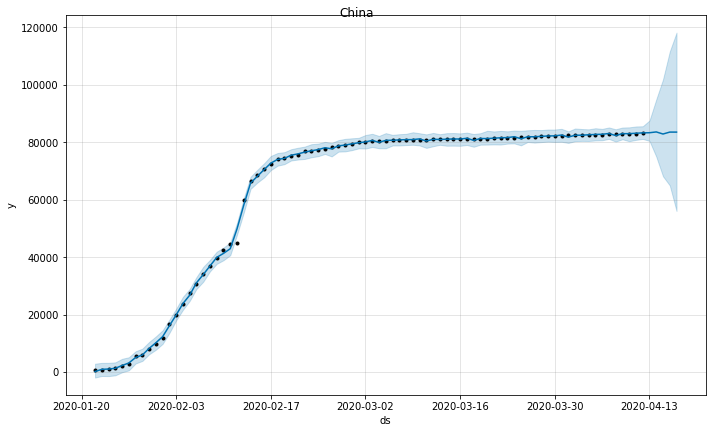

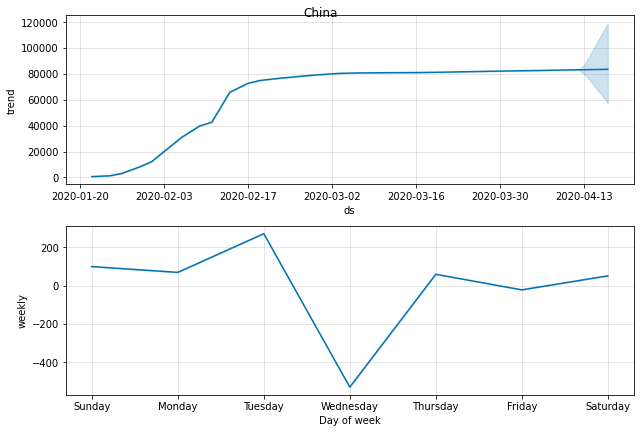

In [26]:
#Comma sepearted list for predictions
# countries = ['China','Thailand','Canada']

countries = ['China']
for country in countries:
   df = countryWiseCasesPredictions(world_df,country)
   results = helper(df,countries)
   results.head()
    



The results are very promising. The error rate is just 0.08 and Forecasted data is within the boundary.

**3. Predict total deaths for a given country?**

In [0]:
def countryWiseDeathPredictions(df,country):
  """
  This functions prepare data state wise for predictions

  Parameters
    df (dataframe) : The dataframe to be processed
    country (str) : Should be valid county name
    state (str) : Should be valid state name
  Returns:  
    state_rn_df (dataframe) - Returns most state wise dataset
  """
  #grouping country wise
  q3_df = df.groupby(['Country_Region','Date'])[['ConfirmedCases','Fatalities']].sum().reset_index()
  #filtering provided country data
  q3_df = q3_df[q3_df.Country_Region == country]
  #Renaming column as per the models needs
  q3_rn_df = q3_df.rename(columns={"Date":"ds","Fatalities":"y"})
  #Dropping unused columns
  q3_rn_df = q3_rn_df.reset_index().drop(["index","ConfirmedCases","Country_Region"],axis= 1)
  return q3_rn_df

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper        y
0 2020-04-13  21179.870155  20766.460204  21629.217214  20465.0
1 2020-04-14  21857.573147  21299.731709  22424.462718  21067.0
2 2020-04-15  22522.393720  21511.867020  23386.556246  21645.0
3 2020-04-16  23157.651774  21494.489418  24185.938308  22170.0
4 2020-04-17  23880.256639  22229.098779  25279.290128  22745.0
Italy MAPE: 3.375233887325507


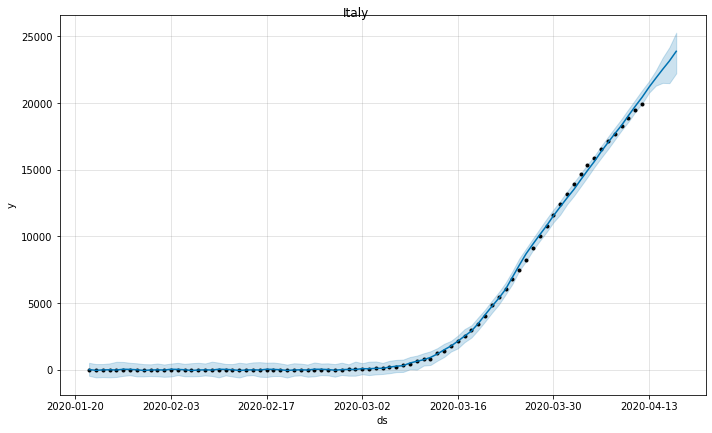

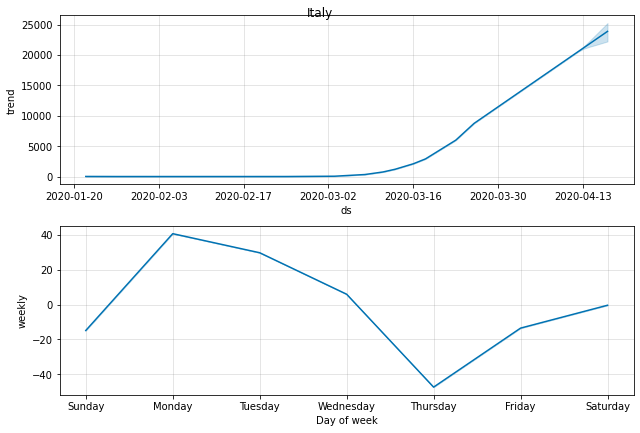

In [28]:
countries = ['Italy']
for country in countries:
   df = countryWiseDeathPredictions(world_df,country)
   results = helper(df,countries)
   results.head()

Cumulative deaths predictions from April-13 to April-17th

The error rate is 1.78

As per the graph, the death rate is growing exponentially here